# Robertson

{func}`.Robertson` - the Robertson problem {cite}`Robertson1966`

$$\begin{aligned}
\frac{dy_{1}}{dt} &= -0.04 y_{1} + 1 \cdot 10^{4} y_{2} y_{3} \\
\frac{dy_{2}}{dt} &= 0.04 y_{1} - 1 \cdot 10^{4} y_{2} y_{3} + 3 \cdot 10^{7} y_{2}^{2} \\
\frac{dy_{3}}{dt} &= 3 \cdot 10^{7} y_{2}^{2}.
\end{aligned}$$

This is a problem that describes an autocatalytic reaction. One of those
commonly used to test stiff ODE solvers. As the parameters in the
literature are fixed, we show here how to define the states in a slightly more compact format.

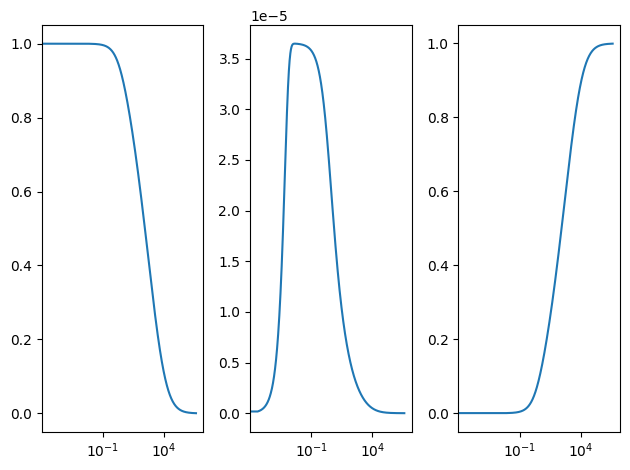

In [1]:
from pygom import DeterministicOde, Transition, TransitionType

import numpy

import matplotlib.pyplot as plt

t = numpy.append(0, 4*numpy.logspace(-6, 6, 1000))

# note how we define the states

stateList = ['y1:4']

paramList = []

transitionList = [Transition(origin='y1', destination='y2', equation='0.04*y1', transition_type=TransitionType.T), 
                  Transition(origin='y2', destination='y1', equation='1e4*y2*y3', transition_type=TransitionType.T), 
                  Transition(origin='y2', destination='y3', equation='3e7*y2*y2', transition_type=TransitionType.T)
                  ]

ode = DeterministicOde(stateList, paramList, transition=transitionList)

ode.initial_values = ([1.0, 0.0, 0.0], t[0])

solution, output = ode.integrate(t[1::], full_output=True)

f, axarr = plt.subplots(1, 3)

for i in range(3):
    axarr[i].plot(t, solution[:,i])
    axarr[i].set_xscale('log')

f.tight_layout();

plt.show()



To simplify even further, we can use <span class="title-ref">y</span>
with the corresponding subscript directly instead of <span
class="title-ref">y1,y2,y3</span>. Again, we do not have any parameters
as they are hard coded into our models.


In [2]:
stateList = ['y1:4']

transitionList = [Transition(origin='y[0]', destination='y[1]', equation='0.04*y[0]', transition_type=TransitionType.T),
                  Transition(origin='y[1]', destination='y[0]', equation='1e4*y[1]*y[2]', transition_type=TransitionType.T), 
                  Transition(origin='y[1]', destination='y[2]', equation='3e7*y[1]*y[1]', transition_type=TransitionType.T)
                  ]

ode = DeterministicOde(stateList, paramList, transition=transitionList)

ode.initial_values =([1.0, 0.0, 0.0], t[0])

solution2 = ode.integrate(t[1::])

numpy.max(solution - solution2)



0.0

and we have the identical solution as shown in the last line above.